In [21]:
import pandas as pd
import numpy as np
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r'E:\Analytics\Projects\Customer Churn Analysis using Tensorflow & Keras\Customer_Churn.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(["CustomerId","Surname"], axis=1, inplace=True)
df_encoded = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)
x = df_encoded.drop("Churned", axis=1)
y = df_encoded["Churned"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
ada = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth = 3),
    n_estimators = 100,
    learning_rate = 0.1,
    random_state = 42
)
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [9]:
y_pred = ada.predict(x_test)
ada_accuracy = accuracy_score(y_test, y_pred)
print("ADA Accuracy", ada_accuracy)

ADA Accuracy 0.861


>10 Estimators     |     0.852 Accuracy     | (0.007) Standard Deviation
>50 Estimators     |     0.855 Accuracy     | (0.008) Standard Deviation
>100 Estimators     |     0.854 Accuracy     | (0.007) Standard Deviation
>500 Estimators     |     0.853 Accuracy     | (0.007) Standard Deviation
>1000 Estimators     |     0.851 Accuracy     | (0.007) Standard Deviation
>5000 Estimators     |     0.845 Accuracy     | (0.008) Standard Deviation


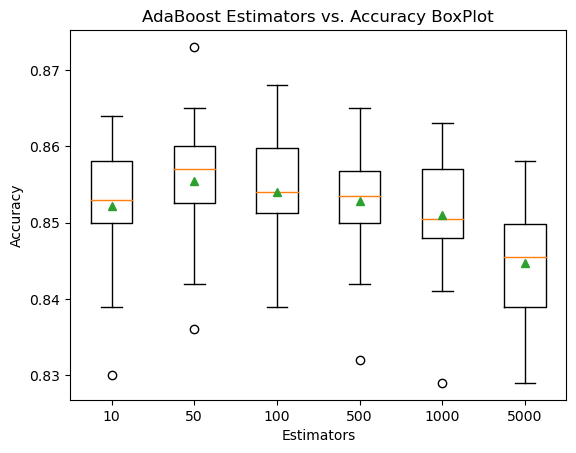

In [31]:
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, x, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, x, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s Estimators     |     %.3f Accuracy     | (%.3f) Standard Deviation' % (name, mean(scores), std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.title("AdaBoost Estimators vs. Accuracy BoxPlot")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.show()